<a href="https://colab.research.google.com/github/chldbwls/cv_2025/blob/main/CV_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.59 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (11992/11992), done.
/content/yolov5


In [9]:
!pip install -r requirements.txt

In [4]:
!curl -L "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -o coco128.zip
!unzip coco128.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  6754k      0  0:00:01  0:00:01 --:--:-- 28.4M
Archive:  coco128.zip
   creating: coco128/
  inflating: coco128/LICENSE         
   creating: coco128/images/
   creating: coco128/images/train2017/
  inflating: coco128/images/train2017/000000000612.jpg  
  inflating: coco128/images/train2017/000000000404.jpg  
  inflating: coco128/images/train2017/000000000438.jpg  
  inflating: coco128/images/train2017/000000000389.jpg  
  inflating: coco128/images/train2017/000000000564.jpg  
  inflating: coco128/images/train2017/000000000149.jpg  
  inflating: coco128/images/train2017/000000000605.jpg  
  inflating: coco128/images/train2017/000000000349.jpg  
  inflating: coco128/images/train2017/000000000201.jpg  
  inflating: coco128/

In [5]:
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt --project ./runs/train --name my_yolo_exp


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-20 05:49:43.805502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750398584.089057    2170 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750398584.156654    2170 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [6]:

!python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source data/images


detect: weights=['runs/train/my_yolo_exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 33.2ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 32.6ms
Speed: 0.5ms pre-process, 32.9ms inference, 83.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')


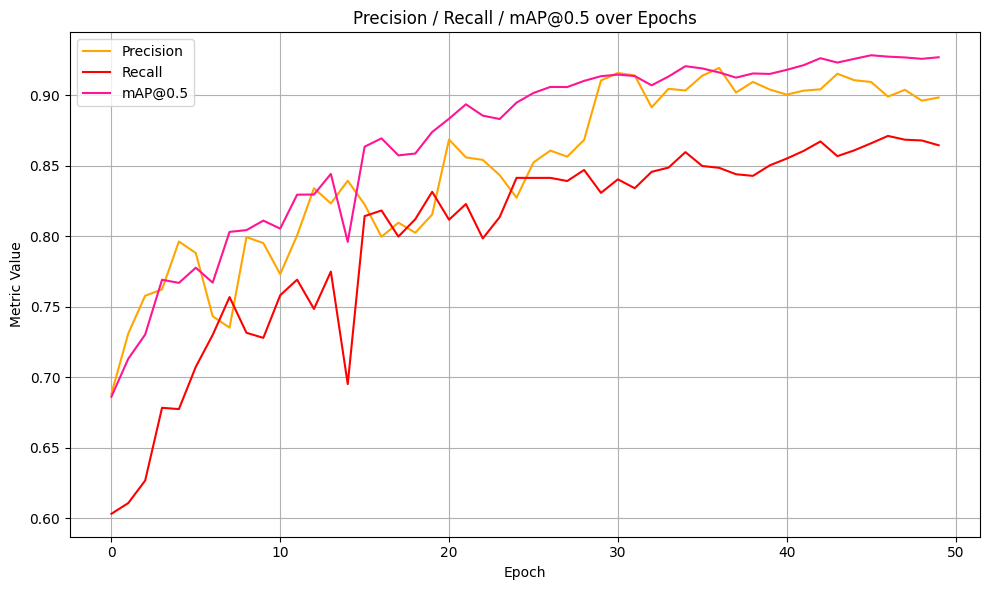

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("runs/train/my_yolo_exp/results.csv")

# 공백 제거
df.columns = df.columns.str.strip()

# 열 이름 확인 (중요!)
print(df.columns)  # 이걸로 어떤 열이 있는지 한번 확인해도 좋아요

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df["epoch"], df["metrics/precision"], label="Precision", color='orange')
plt.plot(df["epoch"], df["metrics/recall"], label="Recall", color='red')
plt.plot(df["epoch"], df["metrics/mAP_0.5"], label="mAP@0.5", color='deeppink')
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Precision / Recall / mAP@0.5 over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
